In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!pip install transformers

In [ ]:
!pip install pytorch_pretrained_bert pytorch-nlp

In [ ]:
import re
import sys
import itertools
import numpy as np
import random as rn
import matplotlib.pyplot as plt
import torch
from pytorch_pretrained_bert import BertModel
from torch import nn
from torchnlp.datasets import imdb_dataset
from pytorch_pretrained_bert import BertTokenizer
from keras.preprocessing.sequence import pad_sequences
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from torch.optim import Adam
from torch.nn.utils import clip_grad_norm_
from IPython.display import clear_output

In [ ]:
rn.seed(321)
np.random.seed(321)
torch.manual_seed(321)
torch.cuda.manual_seed(321)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [ ]:
!pip install sentencepiece

In [ ]:
from transformers import *

class GlobalBERT:
    def __init__(self):
        self.model_class, self.tokenizer_class, self.pretrained_weights = (BertModel, BertTokenizer, 'bert-large-cased')

        self.tokenizer = self.tokenizer_class.from_pretrained(self.pretrained_weights)
        self.model = self.model_class.from_pretrained(self.pretrained_weights, output_hidden_states=True)

    def from_sentence_to_embedding(self, text, use_special_tokens=True):
        raise Exception

class BERT11Sense(GlobalBERT):
    def __init__(self):
        super().__init__()

    def from_sentence_to_embedding(self, text, use_special_tokens=True):
        input_ids = torch.tensor([self.tokenizer.encode(text,
                                                   add_special_tokens=use_special_tokens)])
        outputs = self.model(input_ids)[2]
        return (outputs[12][0]).detach().numpy()
       
       
bb = BERT11Sense()


bb.from_sentence_to_embedding("hello darling")

Some weights of the model checkpoint at bert-large-cased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


array([[ 0.53891903,  1.0641247 ,  0.06854141, ...,  0.49491456,
        -0.45627293,  0.91966647],
       [ 0.19274706, -1.5048006 , -0.03996131, ...,  0.22079   ,
        -0.8769878 ,  0.8757973 ],
       [-0.8659395 , -1.022461  , -0.8534421 , ...,  0.3458095 ,
        -0.1420723 ,  0.37167025],
       [ 0.09797782, -0.00276929,  0.04643975, ...,  0.36611277,
        -0.05931362, -0.04601835]], dtype=float32)

In [ ]:
cd drive/My Drive/Colab Notebooks/experiments

/content/drive/My Drive/Colab Notebooks/experiments


In [ ]:
import pandas as pd
df = pd.read_csv('data/trofix.csv')

In [ ]:
df.head(3)

,arg1,arg2,verb,sentence,verb_stem,label
0,mileage,struck,blow,Triple mileage has struck another blow to the ...,strike,1
1,terrorist,attack,target,U.S. officials said evidence suggests that a J...,attack,0
2,forces,stepped,use,"Some police forces , for example , have steppe...",step,0


In [ ]:
#embeddings = [np.mean(bb.from_sentence_to_embedding(k), axis = 0) for k in df["sentence"].values]

In [ ]:
#embeddings = np.array(embeddings)
#embeddings.shape

In [ ]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

In [ ]:
from sklearn.model_selection import train_test_split

X = df.sentence.values
y = df.label.values

X_train, X_val, y_train, y_val =\
    train_test_split(X, y, test_size=0.1, random_state=2020)

In [ ]:
# Load test data - TroFi
import pandas as pd
# Use a subset for quick experiments
#data = data[:10000]

from sklearn.model_selection import train_test_split as tts
import pandas as pd
data = pd.read_csv("data/trofix.csv")

# Split to train, val and test
train, test_data = tts(data[["sentence", "arg1", "arg2", "verb", "label"]], random_state=42, test_size=0.1)
train, val = tts(train, random_state=42, test_size=test_data.shape[0])

In [ ]:
import nltk
# Uncomment to download "stopwords"
nltk.download("stopwords")
from nltk.corpus import stopwords

def text_preprocessing(s):
    """
    - Lowercase the sentence
    - Change "'t" to "not"
    - Remove "@name"
    - Isolate and remove punctuations except "?"
    - Remove other special characters
    - Remove stop words except "not" and "can"
    - Remove trailing whitespace
    """
    s = s.lower()
    # Change 't to 'not'
    s = re.sub(r"\'t", " not", s)
    # Remove @name
    s = re.sub(r'(@.*?)[\s]', ' ', s)
    # Isolate and remove punctuations except '?'
    s = re.sub(r'([\'\"\.\(\)\!\?\\\/\,])', r' \1 ', s)
    s = re.sub(r'[^\w\s\?]', ' ', s)
    # Remove some special characters
    s = re.sub(r'([\;\:\|•«\n])', ' ', s)
    # Remove stopwords except 'not' and 'can'
    s = " ".join([word for word in s.split()
                  if word not in stopwords.words('english')
                  or word in ['not', 'can']])
    # Remove trailing whitespace
    s = re.sub(r'\s+', ' ', s).strip()
    
    return s

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
X_train

array(["Meanwhile , the discounters and specialty stores that have grabbed sales from Sears in recent years are n't likely to stand still while it tries to catch up .",
       "`` You could n't give the shares away if you tried , '' adds Vahid Fathi , an analyst with Prescott , Ball & Turben Inc. Mr. Munk himself recalls , `` I had many people kick me out . ''",
       'Farmers in Kansas , the No. 1 wheat-producing state , planted 10.2 million acres , the smallest since 1971 .',
       ...,
       "The Japanese carrier was shaken in 1985 by a crash of a JAL Boeing 747 that killed 520 people , the worst single-aircraft accident in aviation history , and safety is a central issue in JAL 's current negotiations with several unions .",
       'To find out the time , a user simply touches a button and the screen displays the time and date .',
       'However , Robert M. Bass Group Inc. of Fort Worth , Texas , which has agreed to pump $ 550 million in new capital into American Savings and ac

In [ ]:
y_train

array([1, 1, 0, ..., 1, 0, 0])

In [ ]:
X_val

array(["Performing his own compositions , traditional R & B tunes , zydeco originals and his interpretations of rock numbers , Buck and the band spit out the kind of crackling music that 's been missing since the heyday of Stax Records , when Booker T. and the MGs pumped a driving rhythm behind Sam & Dave , Carla Thomas and Otis Redding .",
       'Two years ago , Utah state engineers came up with what seemed a logical solution to the seasonal flooding of the Great Salt Lake: Create yet another lake nearby , and pump the excess water into it .',
       "The revised terms stem from ITT 's review of Portland , Ore.-based American Network 's operations , including actual and expected losses , plus ITT 's plan to lend the company short-term financing .",
       'Public reaction to this melodrama nearly destroyed the administration and solidified the belief that no moderates existed in Iran .',
       "She seems to melt a little ; she fits in better with Yefim 's family .",
       'He then 

In [ ]:
y_val

array([1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1])

In [ ]:
#TF-IDF vectorizer - vectorize text data beforecreating the model

%%time
from sklearn.feature_extraction.text import TfidfVectorizer

# Preprocess text
X_train_preprocessed = np.array([text_preprocessing(text) for text in X_train])
X_val_preprocessed = np.array([text_preprocessing(text) for text in X_val])

# Calculate TF-IDF
tf_idf = TfidfVectorizer(ngram_range=(1, 3),
                         binary=True,
                         smooth_idf=False)
X_train_tfidf = tf_idf.fit_transform(X_train_preprocessed)
X_val_tfidf = tf_idf.transform(X_val_preprocessed)

CPU times: user 3.5 s, sys: 388 ms, total: 3.88 s
Wall time: 3.88 s


In [ ]:
# Hyperparameter Tuning

from sklearn.model_selection import StratifiedKFold, cross_val_score

def get_auc_CV(model):
    """
    Return the average AUC score from cross-validation.
    """
    # Set KFold to shuffle data before the split
    kf = StratifiedKFold(5, shuffle=True, random_state=1)

    # Get AUC scores
    auc = cross_val_score(
        model, X_train_tfidf, y_train, scoring="roc_auc", cv=kf)

    return auc.mean()

Best alpha:  2.2


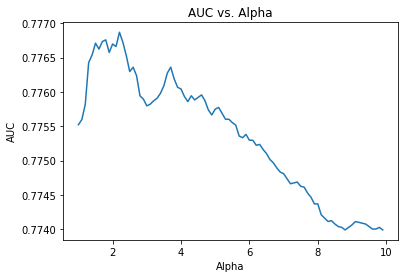

In [ ]:
# MultinomialNB - find the best alpha parameter that gives the highest CV AUC score

from sklearn.naive_bayes import MultinomialNB

res = pd.Series([get_auc_CV(MultinomialNB(i))
                 for i in np.arange(1, 10, 0.1)],
                index=np.arange(1, 10, 0.1))

best_alpha = np.round(res.idxmax(), 2)
print('Best alpha: ', best_alpha)

plt.plot(res)
plt.title('AUC vs. Alpha')
plt.xlabel('Alpha')
plt.ylabel('AUC')
plt.show()

In [ ]:
# Evaluation on validation set - model'saccuracy rate and AUC score on validation set

from sklearn.metrics import accuracy_score, roc_curve, auc

def evaluate_roc(probs, y_true):
    """
    - Print AUC and accuracy on the test set
    - Plot ROC
    @params    probs (np.array): an array of predicted probabilities with shape (len(y_true), 2)
    @params    y_true (np.array): an array of the true values with shape (len(y_true),)
    """
    preds = probs[:, 1]
    fpr, tpr, threshold = roc_curve(y_true, preds)
    roc_auc = auc(fpr, tpr)
    print(f'AUC: {roc_auc:.4f}')
       
    # Get accuracy over the test set
    y_pred = np.where(preds >= 0.5, 1, 0)
    accuracy = accuracy_score(y_true, y_pred)
    print(f'Accuracy: {accuracy*100:.2f}%')
    
    # Plot ROC AUC
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

AUC: 0.8515
Accuracy: 66.21%


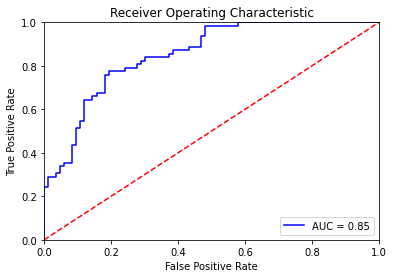

In [ ]:
# Compute predicted probabilities
nb_model = MultinomialNB(alpha=1.8)
nb_model.fit(X_train_tfidf, y_train)
probs = nb_model.predict_proba(X_val_tfidf)

# Evaluate the classifier
evaluate_roc(probs, y_val)

# This is the baseline accuracy score before finetuning

In [ ]:
#LIME
from sklearn.pipeline import make_pipeline
c = make_pipeline(tf_idf, nb_model)

In [ ]:
print(c.predict_proba([X_val[0]]))

[[0.43990977 0.56009023]]


In [ ]:
class_names = ['Literal', 'Metaphorical']

In [ ]:
# BERT Finetuning

In [ ]:
# Some processing before Finetuning

def text_preprocessing(text):
    """
    - Remove entity mentions (eg. '@united')
    - Correct errors (eg. '&amp;' to '&')
    @param    text (str): a string to be processed.
    @return   text (Str): the processed string.
    """
    # Remove '@name'
    text = re.sub(r'(@.*?)[\s]', ' ', text)

    # Replace '&amp;' with '&'
    text = re.sub(r'&amp;', '&', text)

    # Remove trailing whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [ ]:
# Print sentence 0
print('Original: ', X[0])
print('Processed: ', text_preprocessing(X[0]))

Original:  Triple mileage has struck another blow to the coupon market .
Processed:  Triple mileage has struck another blow to the coupon market .


In [ ]:
from transformers import BertTokenizer

# Load the BERT tokenizer
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased') #BertTokenizer.from_pretrained('bert-large-uncased', do_lower_case=True)

# Create a function to tokenize a set of texts
def preprocessing_for_bert(data):
    """Perform required preprocessing steps for pretrained BERT.
    @param    data (np.array): Array of texts to be processed.
    @return   input_ids (torch.Tensor): Tensor of token ids to be fed to a model.
    @return   attention_masks (torch.Tensor): Tensor of indices specifying which
                  tokens should be attended to by the model.
    """
    # Create empty lists to store outputs
    input_ids = []
    attention_masks = []

    # For every sentence...
    for sent in data:
        # `encode_plus` will:
        #    (1) Tokenize the sentence
        #    (2) Add the `[CLS]` and `[SEP]` token to the start and end
        #    (3) Truncate/Pad sentence to max length
        #    (4) Map tokens to their IDs
        #    (5) Create attention mask
        #    (6) Return a dictionary of outputs
        encoded_sent = tokenizer.encode_plus(
            text=text_preprocessing(sent),  # Preprocess sentence
            add_special_tokens=True,        # Add `[CLS]` and `[SEP]`
            max_length=MAX_LEN,                  # Max length to truncate/pad
            pad_to_max_length=True,         # Pad sentence to max length
            #return_tensors='pt',           # Return PyTorch tensor
            return_attention_mask=True      # Return attention mask
            )
        
        # Add the outputs to the lists
        input_ids.append(encoded_sent.get('input_ids'))
        attention_masks.append(encoded_sent.get('attention_mask'))

    # Convert lists to tensors
    input_ids = torch.tensor(input_ids)
    attention_masks = torch.tensor(attention_masks)

    return input_ids, attention_masks

In [ ]:
# Concatenate train data and test data
all_sentences = df['sentence']

# Encode our concatenated data
encoded_sentences = [bb.tokenizer.encode(sent, add_special_tokens=True) for sent in all_sentences]

# Find the maximum length
max_len = max([len(sent) for sent in encoded_sentences])
print('Max length: ', max_len)

Max length:  111


In [ ]:
# Specify `MAX_LEN`
MAX_LEN = 64

# Print sentence 0 and its encoded token ids
token_ids = list(preprocessing_for_bert([X[0]])[0].squeeze().numpy())
print('Original: ', X[0])
print('Token IDs: ', token_ids)

# Run function `preprocessing_for_bert` on the train set and the validation set
print('Tokenizing data...')
train_inputs, train_masks = preprocessing_for_bert(X_train)
val_inputs, val_masks = preprocessing_for_bert(X_val)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Original:  Triple mileage has struck another blow to the coupon market .
Token IDs:  [101, 6420, 3542, 4270, 2038, 4930, 2178, 6271, 2000, 1996, 8648, 2239, 3006, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Tokenizing data...


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2110: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# Convert other data types to torch.Tensor
train_labels = torch.tensor(y_train)
val_labels = torch.tensor(y_val)

# For fine-tuning BERT, the authors recommend a batch size of 16 or 32.
batch_size = 32

# Create the DataLoader for our training set
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create the DataLoader for our validation set
val_data = TensorDataset(val_inputs, val_masks, val_labels)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=batch_size)

In [ ]:
%%time
import torch
import torch.nn as nn
from transformers import BertModel

# Create the BertClassfier class
class BertClassifier(nn.Module):
    """Bert Model for Classification Tasks.
    """
    def __init__(self, freeze_bert=False):
        """
        @param    bert: a BertModel object
        @param    classifier: a torch.nn.Module classifier
        @param    freeze_bert (bool): Set `False` to fine-tune the BERT model
        """
        super(BertClassifier, self).__init__()
        # Specify hidden size of BERT, hidden size of our classifier, and number of labels
        D_in, H, D_out = 768, 50, 2

        # Instantiate BERT model
        self.bert = BertModel.from_pretrained('bert-base-uncased')

        # Instantiate an one-layer feed-forward classifier
        self.classifier = nn.Sequential(
            nn.Linear(D_in, H),
            nn.ReLU(),
            #nn.Dropout(0.5),
            nn.Linear(H, D_out)
        )

        # Freeze the BERT model
        if freeze_bert:
            for param in self.bert.parameters():
                param.requires_grad = False
        
    def forward(self, input_ids, attention_mask):
        """
        Feed input to BERT and the classifier to compute logits.
        @param    input_ids (torch.Tensor): an input tensor with shape (batch_size,
                      max_length)
        @param    attention_mask (torch.Tensor): a tensor that hold attention mask
                      information with shape (batch_size, max_length)
        @return   logits (torch.Tensor): an output tensor with shape (batch_size,
                      num_labels)
        """
        # Feed input to BERT
        outputs = self.bert(input_ids=input_ids,
                            attention_mask=attention_mask)
        
        # Extract the last hidden state of the token `[CLS]` for classification task
        last_hidden_state_cls = outputs[0][:, 0, :]

        # Feed input to classifier to compute logits
        logits = self.classifier(last_hidden_state_cls)

        return logits

CPU times: user 42 µs, sys: 0 ns, total: 42 µs
Wall time: 44.8 µs


In [ ]:
from transformers import AdamW, get_linear_schedule_with_warmup

def initialize_model(epochs=3):
    """Initialize the Bert Classifier, the optimizer and the learning rate scheduler.
    """
    # Instantiate Bert Classifier
    bert_classifier = BertClassifier(freeze_bert=False)

    # Tell PyTorch to run the model on GPU
    bert_classifier.to(device)

    # Create the optimizer
    optimizer = AdamW(bert_classifier.parameters(),
                      lr=5e-5,    # Default learning rate
                      eps=1e-8    # Default epsilon value
                      )

    # Total number of training steps
    total_steps = len(train_dataloader) * epochs

    # Set up the learning rate scheduler
    scheduler = get_linear_schedule_with_warmup(optimizer,
                                                num_warmup_steps=0, # Default value
                                                num_training_steps=total_steps)
    return bert_classifier, optimizer, scheduler

In [ ]:
import random
import time

# Specify loss function
loss_fn = nn.CrossEntropyLoss()

def set_seed(seed_value=42):
    """Set seed for reproducibility.
    """
    random.seed(seed_value)
    np.random.seed(seed_value)
    torch.manual_seed(seed_value)
    torch.cuda.manual_seed_all(seed_value)

def train(model, train_dataloader, val_dataloader=None, epochs=10, evaluation=False):
    """Train the BertClassifier model.
    """
    # Start training loop
    print("Start training...\n")
    for epoch_i in range(epochs):
        # =======================================
        #               Training
        # =======================================
        # Print the header of the result table
        print(f"{'Epoch':^7} | {'Batch':^7} | {'Train Loss':^12} | {'Val Loss':^10} | {'Val Acc':^9} | {'Elapsed':^9}")
        print("-"*70)

        # Measure the elapsed time of each epoch
        t0_epoch, t0_batch = time.time(), time.time()

        # Reset tracking variables at the beginning of each epoch
        total_loss, batch_loss, batch_counts = 0, 0, 0

        # Put the model into the training mode
        model.train()

        # For each batch of training data...
        for step, batch in enumerate(train_dataloader):
            batch_counts +=1
            # Load batch to GPU
            b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)

            # Zero out any previously calculated gradients
            model.zero_grad()

            # Perform a forward pass. This will return logits.
            logits = model(b_input_ids, b_attn_mask)

            # Compute loss and accumulate the loss values
            loss = loss_fn(logits, b_labels)
            batch_loss += loss.item()
            total_loss += loss.item()

            # Perform a backward pass to calculate gradients
            loss.backward()

            # Clip the norm of the gradients to 1.0 to prevent "exploding gradients"
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

            # Update parameters and the learning rate
            optimizer.step()
            scheduler.step()

            # Print the loss values and time elapsed for every 20 batches
            if (step % 20 == 0 and step != 0) or (step == len(train_dataloader) - 1):
                # Calculate time elapsed for 20 batches
                time_elapsed = time.time() - t0_batch

                # Print training results
                print(f"{epoch_i + 1:^7} | {step:^7} | {batch_loss / batch_counts:^12.6f} | {'-':^10} | {'-':^9} | {time_elapsed:^9.2f}")

                # Reset batch tracking variables
                batch_loss, batch_counts = 0, 0
                t0_batch = time.time()

        # Calculate the average loss over the entire training data
        avg_train_loss = total_loss / len(train_dataloader)

        print("-"*70)
        # =======================================
        #               Evaluation
        # =======================================
        if evaluation == True:
            # After the completion of each training epoch, measure the model's performance
            # on our validation set.
            val_loss, val_accuracy = evaluate(model, val_dataloader)

            # Print performance over the entire training data
            time_elapsed = time.time() - t0_epoch
            
            print(f"{epoch_i + 1:^7} | {'-':^7} | {avg_train_loss:^12.6f} | {val_loss:^10.6f} | {val_accuracy:^9.2f} | {time_elapsed:^9.2f}")
            print("-"*70)
        print("\n")
    
    print("Training complete!")


def evaluate(model, val_dataloader):
    """After the completion of each training epoch, measure the model's performance
    on our validation set.
    """
    # Put the model into the evaluation mode. The dropout layers are disabled during
    # the test time.
    model.eval()

    # Tracking variables
    val_accuracy = []
    val_loss = []

    # For each batch in our validation set...
    for batch in val_dataloader:
        # Load batch to GPU
        b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)

        # Compute logits
        with torch.no_grad():
            logits = model(b_input_ids, b_attn_mask)

        # Compute loss
        loss = loss_fn(logits, b_labels)
        val_loss.append(loss.item())

        # Get the predictions
        preds = torch.argmax(logits, dim=1).flatten()

        # Calculate the accuracy rate
        accuracy = (preds == b_labels).cpu().numpy().mean() * 100
        val_accuracy.append(accuracy)

    # Compute the average accuracy and loss over the validation set.
    val_loss = np.mean(val_loss)
    val_accuracy = np.mean(val_accuracy)

    return val_loss, val_accuracy

In [ ]:
import torch

if torch.cuda.is_available():       
    device = torch.device("cuda")
    print(f'There are {torch.cuda.device_count()} GPU(s) available.')
    print('Device name:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
Device name: Tesla V100-SXM2-16GB


In [ ]:
set_seed(42)    # Set seed for reproducibility
bert_classifier, optimizer, scheduler = initialize_model(epochs=10)
train(bert_classifier, train_dataloader, val_dataloader, epochs=10, evaluation=True)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Start training...

 Epoch  |  Batch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 
----------------------------------------------------------------------
   1    |   20    |   0.671436   |     -      |     -     |   2.70   
   1    |   40    |   0.623118   |     -      |     -     |   2.47   
----------------------------------------------------------------------
   1    |    -    |   0.647866   |  0.642360  |   60.59   |   5.33   
----------------------------------------------------------------------


 Epoch  |  Batch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 
----------------------------------------------------------------------
   2    |   20    |   0.484920   |     -      |     -     |   2.65   
   2    |   40    |   0.417450   |     -      |     -     |   2.48   
----------------------------------------------------------------------
   2    |    -    |   0.452008   |  0.575135  |   73.35   |   5.29   
----------------------------------------------------------------

In [ ]:
import torch.nn.functional as F

def bert_predict(model, test_dataloader):
    """Perform a forward pass on the trained BERT model to predict probabilities
    on the test set.
    """
    # Put the model into the evaluation mode. The dropout layers are disabled during
    # the test time.
    model.eval()

    all_logits = []

    # For each batch in our test set...
    for batch in test_dataloader:
        # Load batch to GPU
        b_input_ids, b_attn_mask = tuple(t.to(device) for t in batch)[:2]

        # Compute logits
        with torch.no_grad():
            logits = model(b_input_ids, b_attn_mask)
        all_logits.append(logits)
    
    # Concatenate logits from each batch
    all_logits = torch.cat(all_logits, dim=0)

    # Apply softmax to calculate probabilities
    probs = F.softmax(all_logits, dim=1).cpu().numpy()

    return probs

In [ ]:
from sklearn.metrics import accuracy_score, roc_curve, auc

def evaluate_roc(probs, y_true):
    """
    - Print AUC and accuracy on the test set
    - Plot ROC
    @params    probs (np.array): an array of predicted probabilities with shape (len(y_true), 2)
    @params    y_true (np.array): an array of the true values with shape (len(y_true),)
    """
    preds = probs[:, 1]
    fpr, tpr, threshold = roc_curve(y_true, preds)
    roc_auc = auc(fpr, tpr)
    print(f'AUC: {roc_auc:.4f}')
       
    # Get accuracy over the test set
    y_pred = np.where(preds >= 0.5, 1, 0)
    accuracy = accuracy_score(y_true, y_pred)
    print(f'Accuracy: {accuracy*100:.2f}%')
    
    # Plot ROC AUC
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

AUC: 0.8033
Accuracy: 74.48%


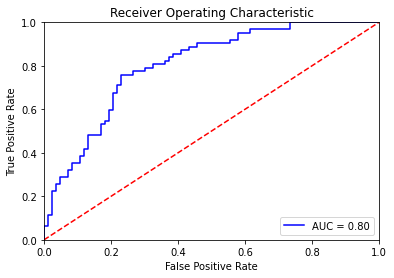

In [ ]:
# Compute predicted probabilities on the test set
probs = bert_predict(bert_classifier, val_dataloader)

# Evaluate the Bert classifier
evaluate_roc(probs, y_val)

In [ ]:
preds = probs[:, 1]
y_pred = np.where(preds >= 0.5, 1, 0)

#importing confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_val, y_pred)
print('Confusion Matrix\n')
print(confusion)

#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_val, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_val, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_val, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_val, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_val, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_val, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_val, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_val, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_val, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_val, y_pred, average='weighted')))

Confusion Matrix

[[65 18]
 [19 43]]

Accuracy: 0.74

Micro Precision: 0.74
Micro Recall: 0.74
Micro F1-score: 0.74

Macro Precision: 0.74
Macro Recall: 0.74
Macro F1-score: 0.74

Weighted Precision: 0.74
Weighted Recall: 0.74
Weighted F1-score: 0.74


In [ ]:
def get_predictions(model, data_loader):
  model.eval()
  
  sentence_texts = []
  predictions = []
  prediction_probs = []
  real_values = []

  with torch.no_grad():
    for d in data_loader:

      texts = d["sentence_text"]
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)

      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)

      probs = F.softmax(outputs, dim=1)

      sentence_texts.extend(texts)
      predictions.extend(preds)
      prediction_probs.extend(probs)
      real_values.extend(targets)

  predictions = torch.stack(predictions).cpu()
  prediction_probs = torch.stack(prediction_probs).cpu()
  real_values = torch.stack(real_values).cpu()
  return sentence_texts, predictions, prediction_probs, real_values

In [ ]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_val, y_pred, target_names=['Literal','Metaphorical']))


Classification Report

              precision    recall  f1-score   support

     Literal       0.77      0.78      0.78        83
Metaphorical       0.70      0.69      0.70        62

    accuracy                           0.74       145
   macro avg       0.74      0.74      0.74       145
weighted avg       0.74      0.74      0.74       145



In [ ]:
#import torch
#torch.save(bert_classifier, 'bert_finetuned.pth')

#saved_model = torch.load('bert_finetuned.pth')

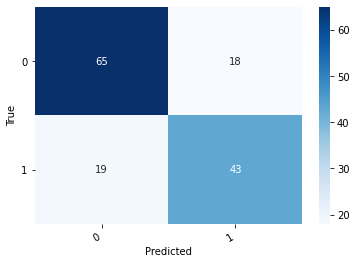

In [ ]:
import seaborn as sns
def show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('True')
  plt.xlabel('Predicted');

cm = confusion_matrix(y_val, y_pred)
#df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
show_confusion_matrix(cm)

##Predictions on Test Set

In [ ]:
# Run `preprocessing_for_bert` on the test set
print('Tokenizing data...')
test_inputs, test_masks = preprocessing_for_bert(test_data.sentence.astype(str))

# Create the DataLoader for our test set
test_dataset = TensorDataset(test_inputs, test_masks)
test_sampler = SequentialSampler(test_dataset)
test_dataloader = DataLoader(test_dataset, sampler=test_sampler, batch_size=32)

Tokenizing data...


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2110: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
# Compute predicted probabilities on the test set
probs = bert_predict(bert_classifier, test_dataloader)

# Get predictions from the probabilities
threshold = 0.4
preds = np.where(probs[:, 1] > threshold, 1, 0)

# Number of tweets predicted non-negative
print("Number of sentences predicted non-metaphorical: ", preds.sum())

Number of sentences predicted non-metaphorical:  67


In [ ]:
output = pd.DataFrame({'sentence': test_data.sentence,
                       'correct_label': test_data.label,
                       'arg1': test_data.arg1,
                       'arg2': test_data.arg2,
                       'verb': test_data.verb,
                       'prediction': preds})
output.to_csv('submission.csv', index=False)

In [ ]:
predictions = pd.read_csv("submission.csv")

In [ ]:
predictions.head()

,sentence,correct_label,arg1,arg2,verb,prediction
0,When she hears that prisoners sometimes carve ...,1,she,grabs,child,1
1,Morty Bennett eats a scallop and shrimp entree...,0,bennett,eats,scallop,0
2,"The latest truce in the week-old battle , whic...",1,which,killed,188,1
3,All agree that the state must diversify its in...,1,state,escape,base,1
4,`` It floods the area instead of having hot pi...,1,it,floods,area,1


In [ ]:
predictions.shape

(145, 6)

In [ ]:
#import pandas as pd
#trofi_predictions = pd.read_csv("stockholm/bert_code/trofi_bert_submission.csv")

In [ ]:
test_data.label.value_counts()

0    80
1    65
Name: label, dtype: int64

In [ ]:
final = predictions[(predictions['correct_label'] == predictions['prediction'])]

In [ ]:
final.shape

(139, 6)

In [ ]:
correct_met = predictions[(predictions['correct_label'] == 1) & (predictions['prediction'] ==1)]

In [ ]:
correct_met.shape

(63, 6)

In [ ]:
correct_lit = predictions[(predictions['correct_label'] == 0) & (predictions['prediction'] ==0)]

In [ ]:
correct_lit.shape

(76, 6)

## Save the Model and Import it


In [ ]:
import os

# Saving best-practices: if you use defaults names for the model, you can reload it using from_pretrained()

output_dir = 'stockholm/bert_code/trofix_bert/bert_model_save'

# output_dir = './content/xlm-roberta_model_save/'

# Create output directory if needed
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print("Saving model to %s" % output_dir)

# Save a trained model, configuration and tokenizer using `save_pretrained()`.
# They can then be reloaded using `from_pretrained()`
model_to_save = bert_classifier.module if hasattr(bert_classifier, 'module') else bert_classifier  # Take care of distributed/parallel training
torch.save(model_to_save, 'bert_improved.pt')
tokenizer.save_pretrained(output_dir)

# Good practice: save your training arguments together with the trained model
# torch.save(args, os.path.join(output_dir, 'training_args.bin'))

Saving model to stockholm/bert_code/trofix_bert/bert_model_save


('stockholm/bert_code/trofix_bert/bert_model_save/tokenizer_config.json',
 'stockholm/bert_code/trofix_bert/bert_model_save/special_tokens_map.json',
 'stockholm/bert_code/trofix_bert/bert_model_save/vocab.txt',
 'stockholm/bert_code/trofix_bert/bert_model_save/added_tokens.json',
 'stockholm/bert_code/trofix_bert/bert_model_save/tokenizer.json')

In [ ]:
import torch
# Load the BERT tokenizer.
print('Loading Bert Base Uncased Tokenizer...')
bert_tokenizer = BertTokenizerFast.from_pretrained(output_dir)
model = torch.load('stockholm/bert_code/trofi_bert/bert_model_save/bert_improved.pt')

Loading Bert Base Uncased Tokenizer...


In [ ]:
model = model.to(device)

## Create the Model

In [ ]:
# Create the model
model_e = BertForSequenceClassification.from_pretrained("bert-base-uncased", output_attentions=True)
# Load pre-trained weights
#checkpoint = torch.load("saved_weights.pt", map_location="cpu")
# Add them to the model
#model_e.load_state_dict(checkpoint)
model_e = model_e.to(device)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
#max pooling to generate a fixed sized sentence embedding


#Max Pooling - Take the max value over time for every dimension
def max_pooling(model_output, attention_mask):
    token_embeddings = model_output[0] #First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.resize_(token_embeddings.size())
    #input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    token_embeddings[input_mask_expanded == 0] = -1e9  # Set padding tokens to large negative value
    max_over_time = torch.max(token_embeddings, 1)[0]
    return max_over_time

def avg_pooling(model_output, attention_mask):
    token_embeddings = model_output[0] #First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.resize_(token_embeddings.size())
    #input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    token_embeddings[input_mask_expanded == 0] = -1e9  # Set padding tokens to large negative value
    avg_over_time = torch.mean(token_embeddings, 1)[0]
    return avg_over_time


#Sentences we want sentence embeddings for
sentences = ['The', 'stars', 'gravitate', 'towards', 'each', 'other.']

#Tokenize sentences
encoded_input = tokenizer(sentences, padding=True, truncation=True, max_length=128, return_tensors='pt')
encoded_input = encoded_input.to(device)

#Compute token embeddings
with torch.no_grad():
    model_output = model_e(**encoded_input)

#Perform pooling. In this case, max pooling
sentence_embeddings = max_pooling(model_output, encoded_input['attention_mask'])
#avg_sentence_embeddings = avg_pooling(model_output, encoded_input['attention_mask'])


print("Sentence embeddings:")
print(sentence_embeddings)

Sentence embeddings:
tensor([-1.1813e-01, -1.9666e-01, -1.9444e-01, -8.4680e-02, -1.0000e+09,
        -1.7639e-01], device='cuda:0')


In [ ]:
# numpy implementation of argmax
from numpy import argmax

sentence_embeddings = sentence_embeddings.cpu()

# get argmax
result = argmax(sentence_embeddings)
print('arg max of %s: %d' % (sentence_embeddings, result))

arg max of tensor([-1.1813e-01, -1.9666e-01, -1.9444e-01, -8.4680e-02, -1.0000e+09,
        -1.7639e-01]): 3


In [ ]:
#CLS token of each input represents the sentence embedding


#Sentences we want sentence embeddings for
sentences = ['The', 'stars', 'gravitate', 'towards', 'each', 'other']


#Tokenize sentences
encoded_input = tokenizer(sentences, padding=True, truncation=True, max_length=128, return_tensors='pt')
encoded_input = encoded_input.to(device)

#Compute token embeddings
with torch.no_grad():
    model_output = model_e(**encoded_input)
    #model_output = model_output.to(device)
    
sentence_embeddings = model_output[0][:,0] #Take the first token ([CLS]) from each sentence 

print("Sentence embeddings:")
print(sentence_embeddings)

Sentence embeddings:
tensor([-0.1670, -0.1967, -0.1338, -0.1896, -0.2688, -0.1801], device='cuda:0')


In [ ]:
# numpy implementation of argmax
from numpy import argmax

sentence_embeddings = sentence_embeddings.cpu()

# get argmax
result = argmax(sentence_embeddings)
print('arg max of %s: %d' % (sentence_embeddings, result))

arg max of tensor([-0.1670, -0.1967, -0.1338, -0.1896, -0.2688, -0.1801]): 2


##Attention and ArgMax

In [ ]:
# Use a subset for quick experiments
#subset_data = data[:10000]

from sklearn.model_selection import train_test_split as tts

# Split to train, val and test
train, test = tts(df[["sentence", "label"]], random_state=42, test_size=0.1)
train, val = tts(train, random_state=42, test_size=test.shape[0])

In [ ]:
# Construct a BERT tokenizer based on WordPiece
bert_tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

In [ ]:
# A sanity check of the tokenizer
encoded_instance = bert_tokenizer.batch_encode_plus([train.iloc[0].sentence], padding=True)
print(encoded_instance)

{'input_ids': [[101, 2074, 2004, 26665, 1998, 10093, 22139, 2215, 2000, 6723, 1037, 3538, 1997, 22035, 15312, 1005, 1055, 3700, 2011, 5378, 1057, 1012, 1055, 1012, 1041, 15549, 7368, 16614, 1010, 22035, 15312, 2003, 19285, 2037, 14585, 1998, 14163, 13112, 3971, 2000, 3749, 20874, 2592, 2006, 4964, 1011, 3318, 5693, 1998, 3097, 12731, 14343, 14767, 1012, 102]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [ ]:
print("Original text:", df.iloc[0].sentence)
print("BERT BPEs:", bert_tokenizer.convert_ids_to_tokens(encoded_instance["input_ids"][0]))

Original text: Triple mileage has struck another blow to the coupon market .
BERT BPEs: ['[CLS]', 'just', 'as', 'reuters', 'and', 'tel', '##erate', 'want', 'to', 'grab', 'a', 'piece', 'of', 'quo', '##tron', "'", 's', 'territory', 'by', 'offering', 'u', '.', 's', '.', 'e', '##qui', '##ties', 'quotes', ',', 'quo', '##tron', 'is', 'eyeing', 'their', 'turf', 'and', 'mu', '##lling', 'ways', 'to', 'offer', 'pricing', 'information', 'on', 'fixed', '-', 'income', 'instruments', 'and', 'foreign', 'cu', '##rre', '##ncies', '.', '[SEP]']


In [ ]:
# Set max_len to the maximum length of the training data 
max_len = max([len(bert_tokenizer.encode(s)) for s in df.sentence.to_list()])
print("The maximum sentence length in training based on BERT BPEs is", max_len)

The maximum sentence length in training based on BERT BPEs is 105


In [ ]:
# Tokenize and encode sentences in each set
x_train = bert_tokenizer.batch_encode_plus(
    train.sentence.tolist(),
    max_length = max_len,
    padding=True,
    truncation=True
)
x_val = bert_tokenizer.batch_encode_plus(
    val.sentence.tolist(),
    max_length = max_len,
    padding=True,
    truncation=True
)
x_test = bert_tokenizer.batch_encode_plus(
    test.sentence.tolist(),
    max_length = max_len,
    padding=True,
    truncation=True
)

In [ ]:
# Convert lists to tensors in order to feed them to our PyTorch model
train_seq = torch.tensor(x_train['input_ids'])
train_mask = torch.tensor(x_train['attention_mask'])
train_y = torch.tensor(train.label.tolist())

val_seq = torch.tensor(x_val['input_ids'])
val_mask = torch.tensor(x_val['attention_mask'])
val_y = torch.tensor(val.label.tolist())

test_seq = torch.tensor(x_test['input_ids'])
test_mask = torch.tensor(x_test['attention_mask'])
test_y = torch.tensor(test.label.tolist())

In [ ]:
batch_size = 32

# Create a dataloader for each set

# TensorDataset: Creates a PyTorch dataset object to load data from
train_data = TensorDataset(train_seq, train_mask, train_y)
# RandomSampler: specify the sequence of indices/keys used in data loading
train_sampler = RandomSampler(train_data)
# DataLoader: a Python iterable over a dataset
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

val_data = TensorDataset(val_seq, val_mask, val_y)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=batch_size)

test_data = TensorDataset(test_seq, test_mask, test_y)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=1)

In [ ]:
# Get attention heatmaps
import matplotlib
from IPython.core.display import display, HTML
def colorize(words, color_array):
    cmap=matplotlib.cm.Reds
    template = '<span class="barcode"; style="color: black; background-color: {}">{}</span>'
    colored_string = ''
    for word, color in zip(words, color_array):
        color = matplotlib.colors.rgb2hex(cmap(color)[:3])
        colored_string += template.format(color, '&nbsp' + word + '&nbsp')
    return colored_string

In [ ]:
from scipy.special import softmax

In [ ]:
# Predict for the test set and save the results
model_e.eval()
test_predictions = []
test_targets = []
test_attentions = []
test_inputs = []

for batch in test_dataloader:
  batch = [t.to(device) for t in batch]
  sent_id, mask, labels = batch
  # Get gold labels
  test_targets.extend(labels.detach().cpu().numpy())
  # Get input words
  test_inputs.append(bert_tokenizer.convert_ids_to_tokens(sent_id.detach().cpu().numpy()[0]))
  with torch.no_grad():
    # Get predictions
    outputs = model_e(sent_id, attention_mask=mask)
    # Apply softmax to the outputs
    output_probs = softmax(outputs.logits.detach().cpu().numpy(), axis=1)
    # Get the with the highest probability as the predicted label
    test_predictions.extend(np.argmax(output_probs, axis=1))
    # Get attention weights
    # Attention weights from all layers are returned in a tuple
    # The weights from each layer are in a tensor with shape (batch_size, attention_heads, max_len, max_len)
    test_attentions.append(outputs.attentions)

In [ ]:
# Max Pooling for all tokens in sentences and argmax

# Select some sentences randomly
sent_index = [1, 2, 3]

for s in sent_index:
  print("*" * 100)
  # For each layer...
  for l in range(12):
    print("\nLayer", l+1)
    attention = np.squeeze(test_attentions[s][l].detach().cpu().numpy(), axis=0)
    # and for each head
    for h, head in enumerate(attention):
      print("Head", h+1)
      # Get the sentence's words
      tokens = test_inputs[s]
      encoded_tokens = bert_tokenizer(tokens, padding=True, truncation=True, max_length=128, return_tensors='pt')
      encoded_tokens = encoded_tokens.to(device)
      with torch.no_grad():
        model_output1 = model_e(**encoded_tokens)
        tokens_embeddings = max_pooling(model_output1, encoded_tokens['attention_mask'])
        tokens_embeddings = tokens_embeddings.cpu()
        # Get the attention for the cls token
        cls_attentions = head[0]
        display(HTML(colorize(tokens, cls_attentions)))
        print("Tokens embeddings:")
        print(tokens_embeddings)
        arg = argmax(tokens_embeddings)
        print('arg max of %s: %d' % (tokens_embeddings, arg))

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Max Pooling for all tokens in sentences and argmax

# Select some sentences randomly
sent_index = [4, 5, 6]

for s in sent_index:
  print("*" * 100)
  # Get the sentence's words
  tokens = test_inputs[s]
  # For each layer...
  for l in range(12):
    print("\nLayer", l+1)
    attention = np.squeeze(test_attentions[s][l].detach().cpu().numpy(), axis=0)
    # and for each head
    for h, head in enumerate(attention):
      print("Head", h+1)
      # Get the attention for the cls token
      encoded_tokens = bert_tokenizer(tokens, truncation=True, padding=True, max_length=128, return_tensors='pt')
      encoded_tokens = encoded_tokens.to(device)
      with torch.no_grad():
        model_output1 = model_e(**encoded_tokens)
        tokens_embeddings = max_pooling(model_output1, encoded_tokens['attention_mask'])
        tokens_embeddings = tokens_embeddings.cpu()
        cls_attentions = head[0]
        display(HTML(colorize(tokens, cls_attentions)))
        print("Tokens embeddings:")
        print(tokens_embeddings)
        arg = argmax(tokens_embeddings)
        print('arg max of %s: %d' % (tokens_embeddings, arg))

Output hidden; open in https://colab.research.google.com to view.